In [1]:
import json
import pandas as pd
import math
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline

In [2]:
# reading the JSON data using json.load()
file = './data/GoogleLocation.json'
with open(file) as train_file:
    data_json = json.load(train_file)

In [3]:
df = pd.DataFrame({'raw': data_json['locations']})

In [4]:
# Extract the base data
df['timestampMs'] = df.apply(lambda row: int(row['raw']['timestampMs']), axis=1)
df['latitudeE7'] = df.apply(lambda row: row['raw']['latitudeE7'], axis=1)
df['longitudeE7'] = df.apply(lambda row: row['raw']['longitudeE7'], axis=1)
df['accuracy'] = df.apply(lambda row: row['raw']['accuracy'], axis=1)

# Plotting the locations

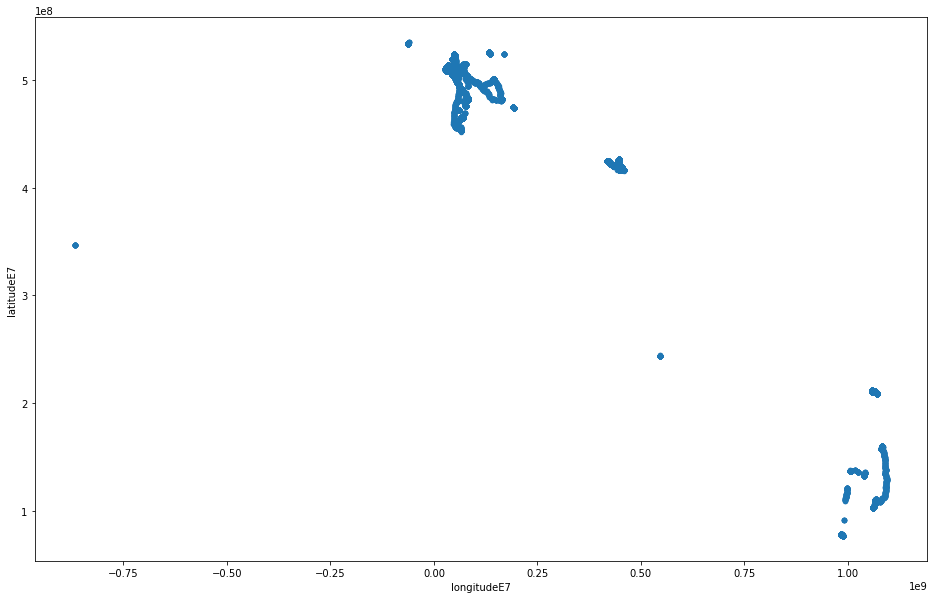

In [5]:
df.plot(x='longitudeE7', y='latitudeE7', figsize=(16, 10), kind='scatter')

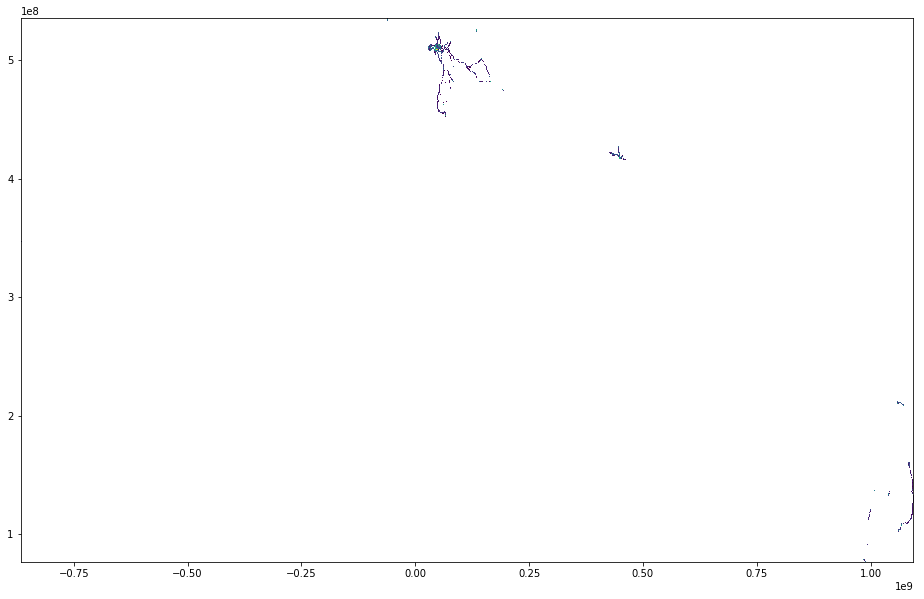

In [6]:
plt.figure(figsize=(16, 10))
_,_,_,img = plt.hist2d(x=df.longitudeE7, y=df.latitudeE7, bins=1000, norm=mpl.colors.LogNorm())

In [7]:
def zoom(x_min, x_max, y_min, y_max):
    selection_long = (df['longitudeE7']>x_min) & (df['longitudeE7']<x_max)
    selection_lat = (df['latitudeE7']>y_min) & (df['latitudeE7']<y_max)
    selection = selection_long & selection_lat

    # df[selection].plot(x='longitudeE7', y='latitudeE7', figsize=(16, 10), kind='scatter')
    plt.figure(figsize=(16, 10))
    # bins = [(x_max-x_min)/3000, (y_max-y_min)/3000]
    _,_,_,img = plt.hist2d(x=df[selection].longitudeE7, y=df[selection].latitudeE7, bins=300, norm=mpl.colors.LogNorm())

### Zoom in to Georgia

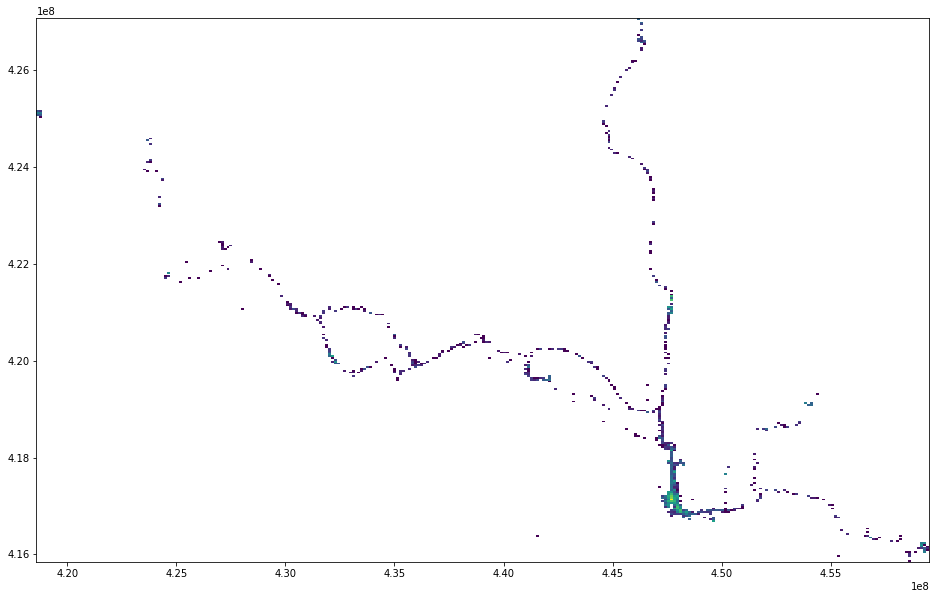

In [8]:
zoom(410_000_000, 470_000_000, 410_000_000, 430_000_000)

### Tbilisi

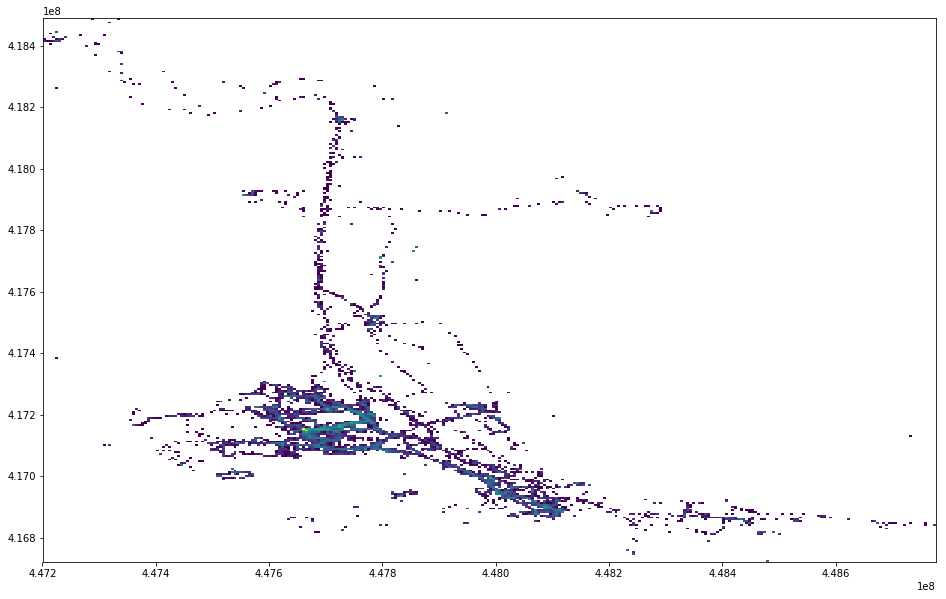

In [9]:
zoom(447_200_000, 448_800_000, 410_000_000, 418_500_000)

### Tbilisi core

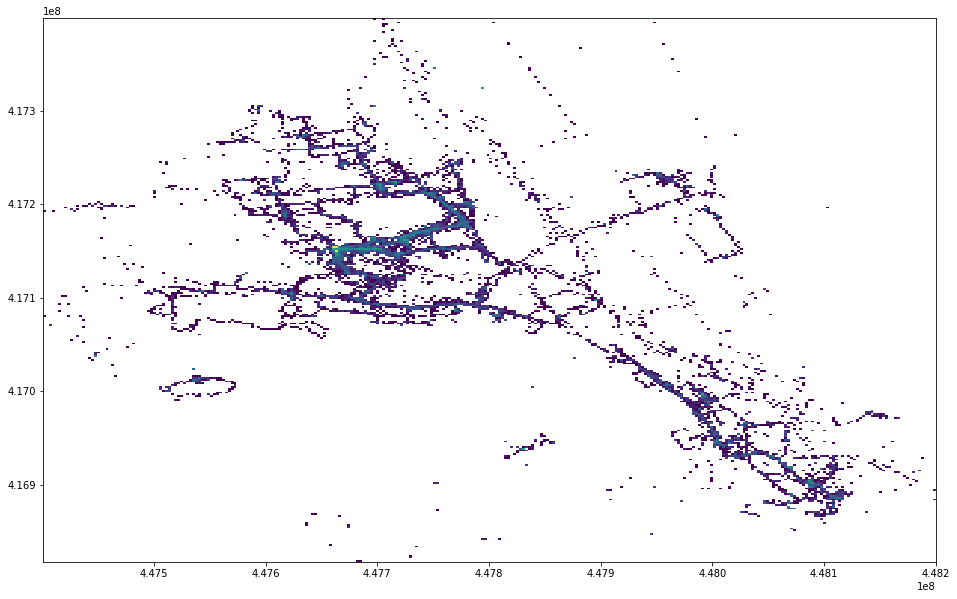

In [10]:
zoom(447_400_000, 448_200_000, 410_000_000, 417_400_000)

### Tinatis Neighbourhood

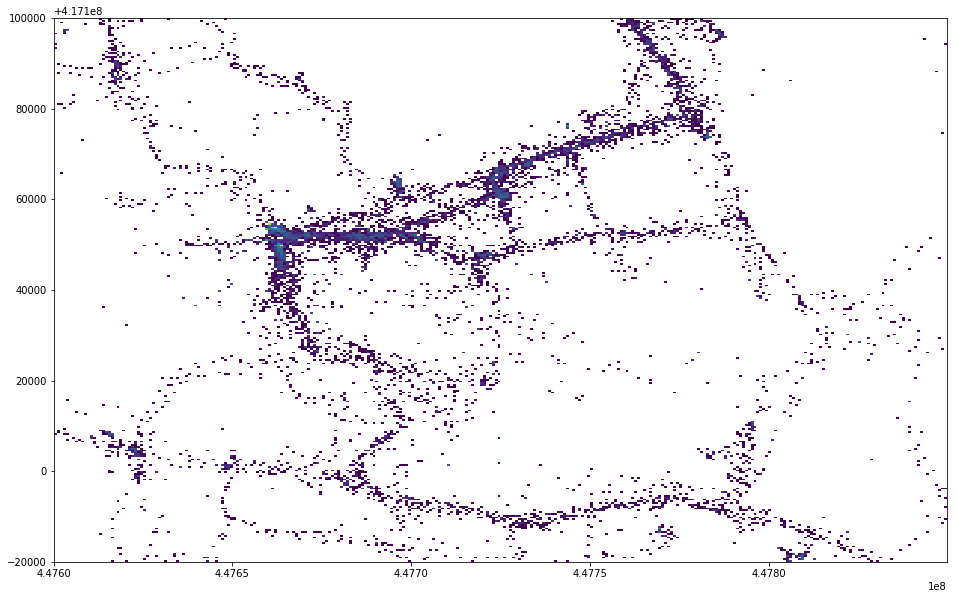

In [11]:
zoom(447_600_000, 447_850_000, 417_080_000, 417_200_000)

### In Europe

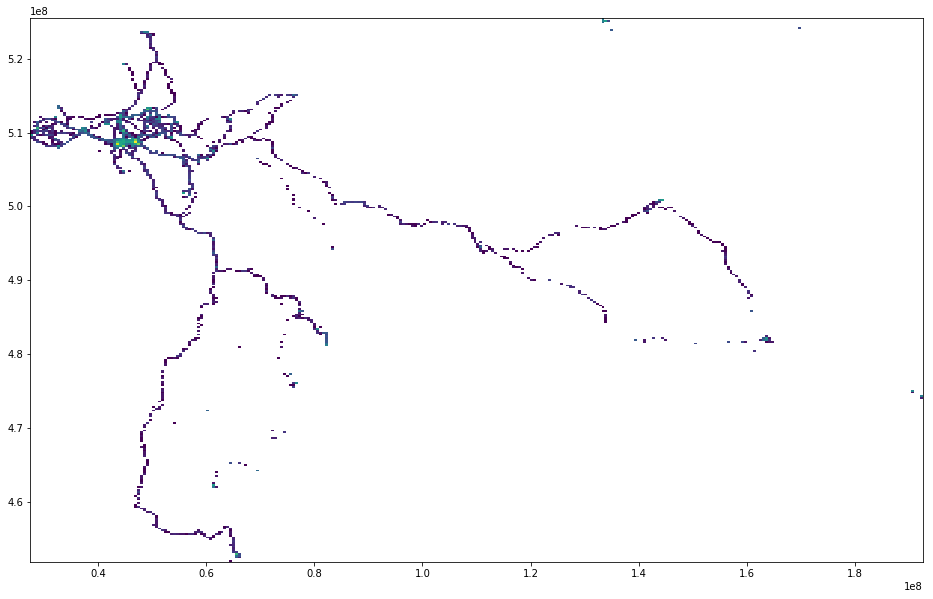

In [12]:
zoom(10_000_000, 400_000_000, 400_000_000, 700_000_000)

### Zooming into Belgium

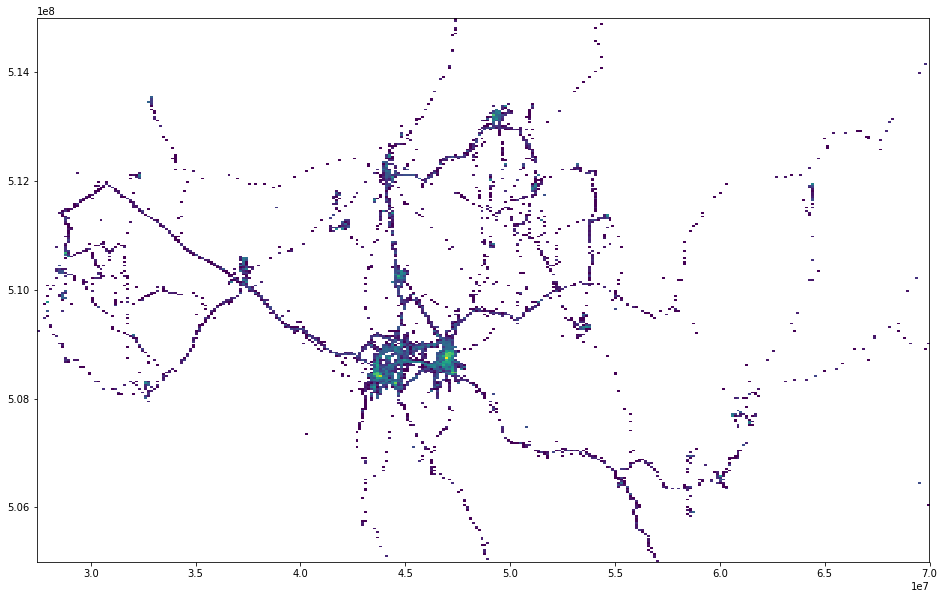

In [13]:
zoom(10_000_000, 70_000_000, 505_000_000, 515_000_000)

### Zooming into Leuven and Brussels

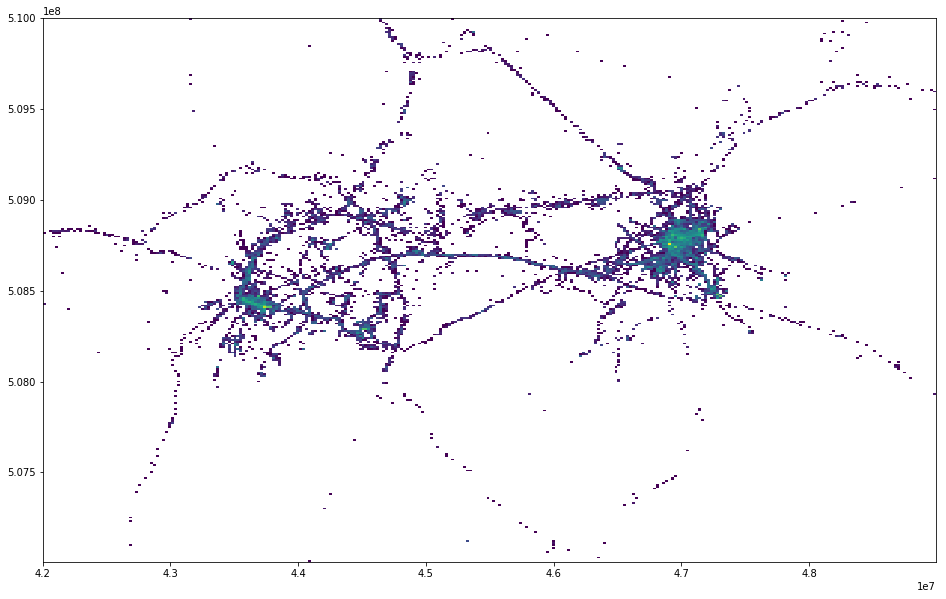

In [14]:
zoom(42_000_000, 49_000_000, 507_000_000, 510_000_000)

### Zooming into Brussels

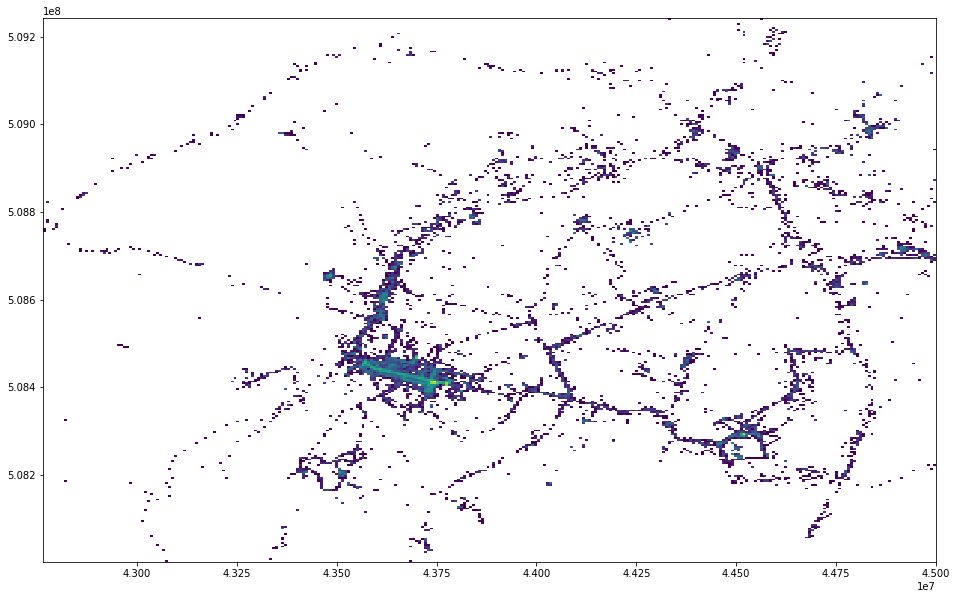

In [15]:
zoom(42_750_000, 45_000_000, 508_000_000, 509_250_000)

### Leuven & campus & Cegeka

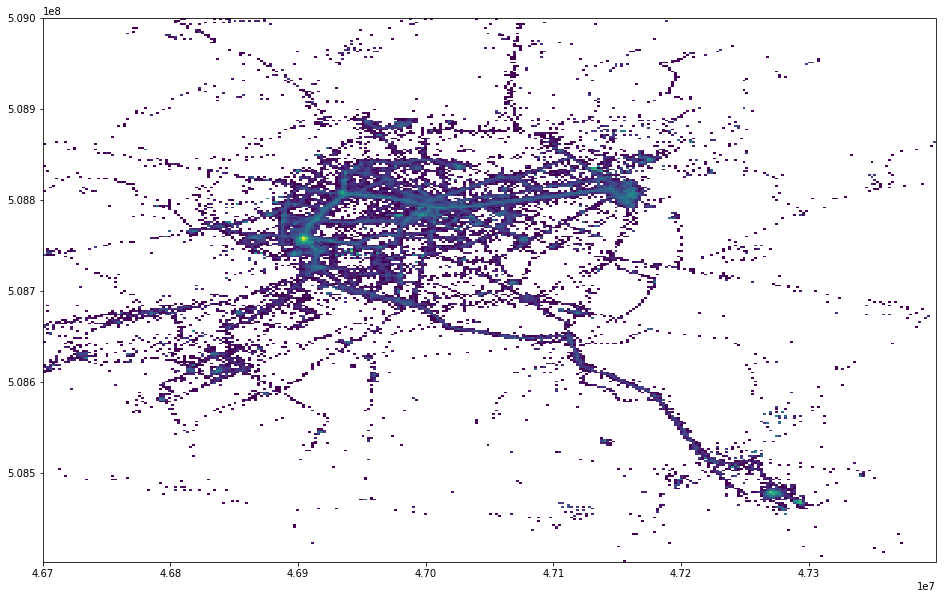

In [16]:
zoom(46_700_000, 47_400_000, 508_400_000, 509_000_000)

### Leuven

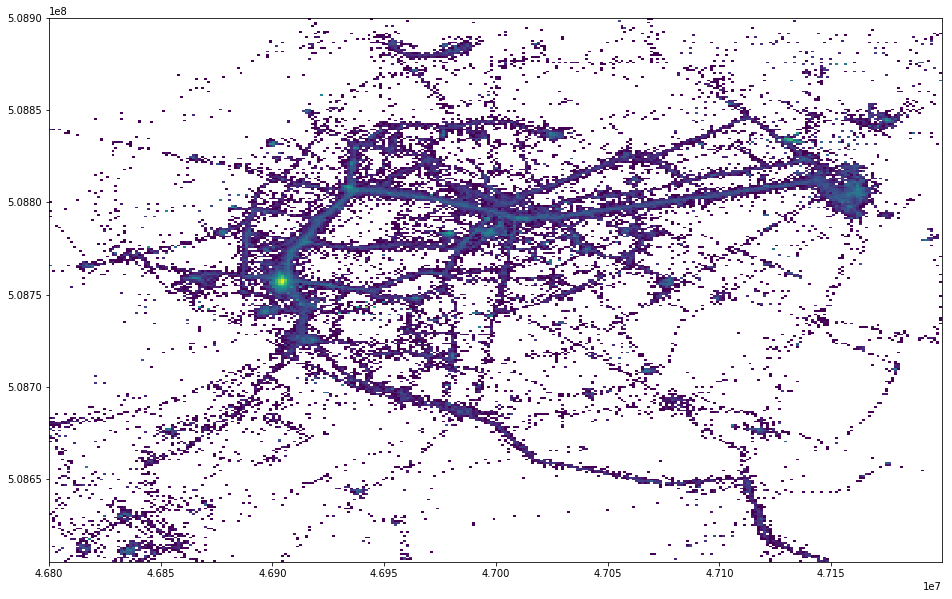

In [17]:
zoom(46_800_000, 47_200_000, 508_605_000, 508_900_000)

### Zoom in to Bankstraat

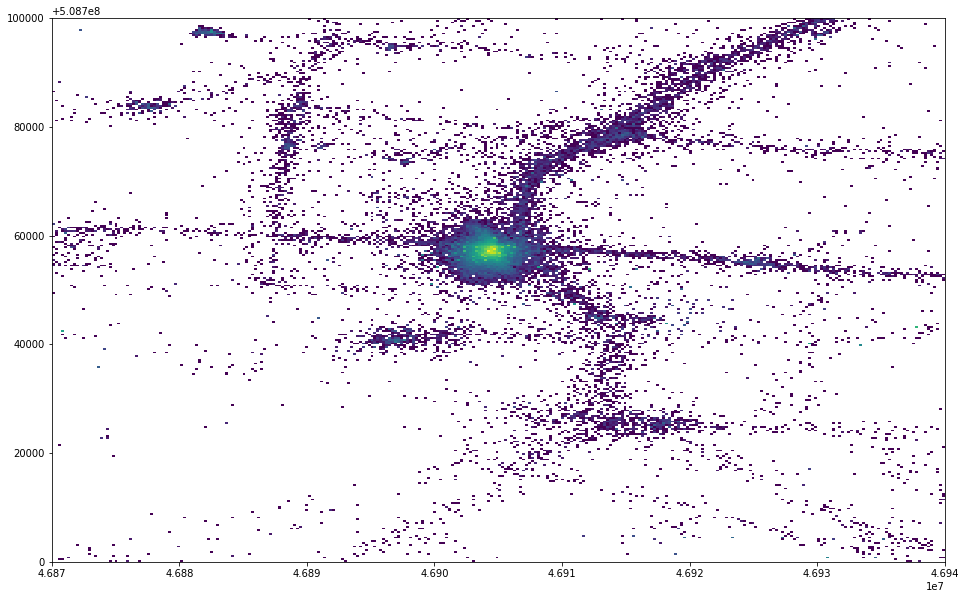

In [18]:
zoom(46_870_000, 46_940_000, 508_700_000, 508_800_000)